# Upscale Images with Pre-trained `super-image` Models

---

[Github](https://github.com/eugenesiow/super-image) | All Models @ [huggingface.co](https://huggingface.co/models?filter=super-image)

---

Notebook to use the `super-image` library to quickly upscale and image.

The technique used is applying a pre-trained deep-learning model to restore a high resolution (HR) image from a single low resolution (LR) image. This is also called image super resolution.

The notebook is structured as follows:
* Setting up the Environment
* Using the Model (Running Inference)

## Setting up the Environment

#### Install the library

We will install the `super-image` library using `pip install`.

In [1]:
!pip install -qq super-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 1.8 MB/s eta 0:00:00


## Using the Model (Running Inference)

Next we run a few lines of code to:

* `Image.open` and `requests.get` - Download an image from a URL (website) and store this as the `image` variable.
* `EdsrModel.from_pretrained` - Download and load a small, pre-trained deep-learning model to the `model` variable.
* `ImageLoader.load_image` - Load the image into the `model` using the `ImageLoader` helper.
* Use the model to run inference on the image (`inputs`).
* `ImageLoader.save_image` - Save the upscaled image output as a `.png` file using the `ImageLoader` helper.
* `ImageLoader.save_compare` - Save a `.png` that compares our upscaled image from the model with a baseline image using `Bicubic` upscaling.

In [2]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests

url = 'https://paperswithcode.com/media/datasets/Set5-0000002728-07a9793f_zA3bDjj.jpg'
image = Image.open(requests.get(url, stream=True).raw)

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:680: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public m

config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

pytorch_model_2x.pt:   0%|          | 0.00/5.51M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


/usr/local/lib/python3.10/dist-packages/super_image/modeling_utils.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(resolved_archive_file, map_l

View the comparison image to see, visually, how our model performed (on the right) against the baseline bicubic method (left).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


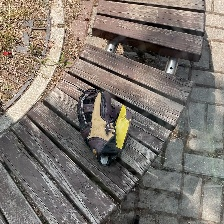

In [4]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/test/Input/TEST_000.jpg')
cv2_imshow(img)

In [8]:
import os
# 이미지가 있는 폴더 경로
image_folder = '/content/drive/MyDrive/hello'

# 저장할 폴더 경로
save_folder = '/content/drive/MyDrive/hello_saved'  # 저장할 폴더를 생성하세요.



# 저장할 폴더가 없으면 생성
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
# 이미지 파일 이름 가져오기
image_files = os.listdir(image_folder)

# 각 이미지 파일에 대해 처리
for filename in image_files:
  # 이미지 파일 경로
  image_path = os.path.join(image_folder, filename)

  # 이미지 읽기
  img = cv2.imread(image_path)

  # 이미지 저장 경로
  save_path = os.path.join(save_folder, filename)

  # 이미지 저장
  cv2.imwrite(save_path, img)

print("모든 이미지가 저장되었습니다.")

모든 이미지가 저장되었습니다.


We can view the original image that we pulled from the URL/website using `cv2_imshow`.

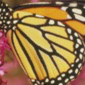

In [ ]:
import numpy as np

cv2_imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))